In [11]:
import copy

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from Assignment_1.Assignment_1.Part_2_aero_design_functions import single_point_design, get_design_functions
from lacbox.io import load_ae, save_ae
from lacbox.test import test_data_path
from lacbox.io import load_c2def

scale_ratio_blade_new = 1.0194
scale_ratio_blade_old = 1.0388
tsr_new = 7.52 
tsr_old = 7.05
tsr_single_point_design = 7.1313



# FancyPlots

In [12]:
import matplotlib
import scienceplots

matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use(['science'])

# Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'normal'

In [13]:
"""Dumb functions we wrote because we forgot lacbox exists"""
def read_data(file_path):
    """Reads a data file and extracts three columns of float data."""
    column_1, column_2, column_3 = [], [], []
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if not line:
                continue
            try:
                if ';' in line:
                    line = line.split(';')[0]  # Remove comments
                values = list(map(float, line.split()))
                if len(values) >= 3:
                    column_1.append(values[0])
                    column_2.append(values[1])
                    column_3.append(values[2])
            except ValueError:
                continue  # Skip lines with invalid data
    return np.array(column_1), np.array(column_2), np.array(column_3)

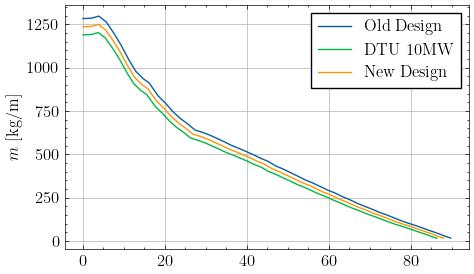

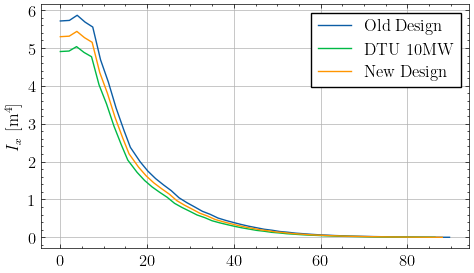

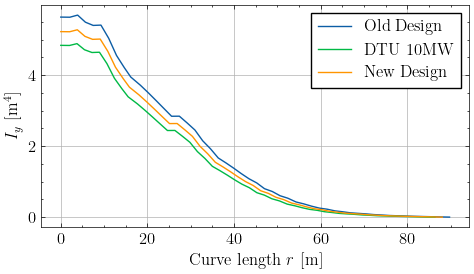

In [34]:
"""Script/module for scaling the HAWC2 ST-data

The file can be run directly which shows an example of how to scale the ST-data
The file can also be imported as a module where the `scale_ST_data` can be used in another script/notebook
"""
from pathlib import Path

import lacbox.io

def scale_ST_data(baseline_st_data, scale_factor):
    """Applying scaling for a baseline HAWC2 ST-file.

    Parameters
    ----------
    baseline_st_data : dict
        Dict containing the baseline ST-data. The ST-data can be loaded with `lacbox.load_st`
    scale_factor : float
        Scaling factor to apply for the ST-data. If scaling factor is using rotor span it can be computed as: `scale_factor = R_new/R_old`

    Returns
    -------
    dict
        The scaled ST-data. Can be written to file with `lacbox.save_st`
    """
    st_data = dict()
    st_data["s"] = baseline_st_data["s"] * scale_factor
    st_data["m"] = baseline_st_data["m"] * scale_factor**2
    st_data["x_cg"] = baseline_st_data["x_cg"] * scale_factor
    st_data["y_cg"] = baseline_st_data["y_cg"] * scale_factor
    st_data["ri_x"] = baseline_st_data["ri_x"] * scale_factor
    st_data["ri_y"] = baseline_st_data["ri_y"] * scale_factor
    st_data["x_sh"] = baseline_st_data["x_sh"] * scale_factor
    st_data["y_sh"] = baseline_st_data["y_sh"] * scale_factor
    st_data["E"] = baseline_st_data["E"]
    st_data["G"] = baseline_st_data["G"]
    st_data["I_x"] = baseline_st_data["I_x"] * scale_factor**4
    st_data["I_y"] = baseline_st_data["I_y"] * scale_factor**4
    st_data["I_p"] = baseline_st_data["I_p"] * scale_factor**4
    st_data["k_x"] = baseline_st_data["k_x"]
    st_data["k_y"] = baseline_st_data["k_y"]
    st_data["A"] = baseline_st_data["A"] * scale_factor**2
    st_data["pitch"] = baseline_st_data["pitch"]
    st_data["x_e"] = baseline_st_data["x_e"] * scale_factor
    st_data["y_e"] = baseline_st_data["y_e"] * scale_factor
    return st_data


if __name__ == "__main__":
    # %% Import modules
    import matplotlib.pyplot as plt
    from lacbox.io import load_st

    # %% Inputs
    # Baseline ST-data (DTU 10MW)
    path_st_file_DTU10MW = test_data_path + '/dtu_10_mw/data/DTU_10MW_RWT_Blade_st.dat'
    st_data_DTU10MW = load_st(path_st_file_DTU10MW, 0, 0)  # Baseline data
    
    # %% Scaling ST-data
    st_data = scale_ST_data(st_data_DTU10MW, scale_ratio_blade_new)
    
    st_data_old = scale_ST_data(st_data_DTU10MW, scale_ratio_blade_old)

    # %% Plotting scaled and baseline data
    # Plotting m, I_x, I_y, I_p, S_chord, S_thickness
    fig_mass, axs = plt.subplots(figsize=(5, 3))
    # m_d
    axs.plot(st_data_old["s"], st_data_old["m"], label="Old Design")
    axs.plot(st_data_DTU10MW["s"], st_data_DTU10MW["m"], label="DTU 10MW")
    axs.plot(st_data["s"], st_data["m"], label="New Design")
    axs.set_ylabel("$m$ [kg/m]")
    axs.grid()
    axs.legend()
    fig_mass.tight_layout()
    plt.savefig('../Plots/BladeParams/mass.pdf')
    # I_x
    fig_Ix, axs = plt.subplots(figsize=(5, 3))
    axs.plot(st_data_old["s"], st_data_old["I_x"], label="Old Design")
    axs.plot(st_data_DTU10MW["s"], st_data_DTU10MW["I_x"], label="DTU 10MW")
    axs.plot(st_data["s"], st_data["I_x"], label="New Design")
    axs.set_ylabel("$I_x$ [m$^4$]")
    axs.grid()
    axs.legend()
    fig_Ix.tight_layout()
    plt.savefig('../Plots/BladeParams/Ix.pdf')
    
    # I_y

    fig_Iy, axs = plt.subplots(figsize=(5, 3))
    axs.plot(st_data_old["s"], st_data_old["I_y"], label="Old Design")
    axs.plot(st_data_DTU10MW["s"], st_data_DTU10MW["I_y"], label="DTU 10MW")
    axs.plot(st_data["s"], st_data["I_y"], label="New Design")
    axs.set_ylabel("$I_y$ [m$^4$]")
    axs.set_xlabel("Curve length $r$ [m]")
    axs.grid()
    axs.legend()

    fig_Iy.tight_layout()
    plt.savefig('../Plots/BladeParams/Iy.pdf')
    plt.show()

In [15]:
"""SINGLE POINT DESIGN CRAP HERE"""
"""Runs the single-point design for a range of TSR values and plots CP and CT (new design)."""

# File path and scaling factor for new design
ae_path = test_data_path + '/dtu_10_mw/data/DTU_10MW_RWT_ae.dat'

htc_path = test_data_path + '/dtu_10_mw/DTU_10MW_RWT.htc'

c2_def = load_c2def(htc_path)

twist_10mw = - c2_def[:,3] # 
r_10mw_twist = c2_def[:,2]


"""NEW SCALE RATIO OF THE BLADE HERE"""
# scale_ratio_blade = 1.0194 

"""IDENTICAL TO OLD EXCEPT MAINTAIN MAX CHORD AS DTU """
# Read new design data
r, c_10mw, tc_10mw = read_data(ae_path)

r_old = r* scale_ratio_blade_old

r_old = r_old[:-1] + 2.8

r_10mw = copy.deepcopy(r)
c_new = copy.deepcopy(c_10mw)

c_new *= scale_ratio_blade_new
c_new[:4] = 5.38  # First 4 values of our design maintain identical chord
c_new[4] = 5.386
c_new[5] = 5.5
t_new = tc_10mw[:-1] / 100 * c_new[:-1]
r *= scale_ratio_blade_new

c_old = c_10mw* scale_ratio_blade_old
c_old[:4] = 5.38 
c_old[4] = 5.386
c_old[5] = 5.5
t_old = tc_10mw[:-1] / 100 * c_old[:-1]


r_hub = 2.8  # Hub radius [m]
R = r_hub + r[-1]  # Rotor radius [m]
r = r[:-1] + r_hub  # Adjust rotor span with hub radius

print(r)
"""MAINTAINING DTU MAX CHORD"""
# Max and root chord sizes
chord_max = 6.20 
chord_root = 5.38
B = 3  # Number of blades
design_function_int = 2

# Aerodynamic polar design functions
cl_des, cd_des, aoa_des, tc_vals, cl_vals, cd_vals, aoa_vals = get_design_functions(design_function_int)

chord, tc, twist, cl, cd, aoa, a, CLT, CLP, CT, CP = single_point_design(
            r, t_new, tsr_single_point_design, R, cl_des, cd_des, aoa_des, chord_root, chord_max, B
        )

chord_old, tc_old, twist_old, cl_old, cd_old, aoa_old, a_old, CLT_old, CLP_old, CT_old, CP_old = single_point_design(
            r_old, t_old, tsr_old, 92.50, cl_des, cd_des, aoa_des, chord_root, chord_max*scale_ratio_blade_old, B
        )


print(max(chord))
print(max(c_10mw))


[ 2.8        4.8388     7.6034128  8.3006824  9.2415886 10.420015
 11.8298452 13.4608852 15.3059992 17.351935  19.5864598 21.9983602
 24.5703064 27.2890462 30.1372498 33.0975874 36.1537486 39.2853454
 42.475048  45.7024684 48.9502768 52.1970658 55.4244862 58.61215
 61.741708  64.794811  67.7520904 70.5962164 73.3098592 75.8777278
 78.2835118 80.5129396 82.5517396 84.3897178 86.0146414 87.4163164
 88.587607  89.520358  90.2094724]
6.199977967485269
6.202


In [25]:
fig2, axs2 = plt.subplots(3, 1, num=2, clear=True, sharex=True, figsize=(5, 3))

# Chord
axs2[0].plot(r_10mw[:-1], c_10mw[:-1], label='DTU 10MW')
axs2[0].plot(r_old - r_hub, chord_old, label='Old Design')
axs2[0].plot(r - r_hub, chord, label='New Design')
axs2[0].set_ylabel("Chord [m]")
axs2[0].set_xlim(0, R)
axs2[0].grid(alpha=0.7, linewidth=0.5, linestyle='--')
axs2[0].legend(fontsize=10).get_frame().set_linewidth(0.5)

# Twist
axs2[1].plot(r_10mw_twist, twist_10mw, label='DTU 10MW')
axs2[1].plot(r_old - r_hub, twist_old, label='Old Design')
axs2[1].plot(r - r_hub, twist, label='New Design')
axs2[1].set_ylabel("Twist [deg]")
axs2[1].set_xlim(0, R)
axs2[1].grid(alpha=0.7, linewidth=0.5, linestyle='--')

# t/c
axs2[2].plot(r_10mw[:-1], tc_10mw[:-1], label='DTU 10MW')
axs2[2].plot(r_old - r_hub, tc_old, label='Old Design')
axs2[2].plot(r - r_hub, tc, label='New Design')
axs2[2].set_ylabel("Rel. Thickness [%]")
axs2[2].set_xlabel("Blade span [m]")
axs2[2].set_xlim(0, R)
axs2[2].grid(alpha=0.7, linewidth=0.5, linestyle='--')

fig2.tight_layout()
fig2.savefig('../Plots/distribution_blade_compare.pdf', dpi=300, bbox_inches='tight')

In [28]:
# Chord Distribution
fig_chord, ax_chord = plt.subplots(figsize=(5, 3))
ax_chord.plot(r_10mw[:-1], c_10mw[:-1], label='DTU 10MW')  
ax_chord.plot(r_old - r_hub, chord_old, label='Old Design')
ax_chord.plot(r - r_hub, chord, label='New Design') 
ax_chord.set_ylabel("Chord [m]")
ax_chord.set_xlim(0, R)
ax_chord.grid(alpha=0.7, linewidth=0.5, linestyle='--')
ax_chord.legend(fancybox=False, edgecolor="black",fontsize = 10).get_frame().set_linewidth(0.5)
fig_chord.tight_layout()
fig_chord.savefig('../Plots/chord_distribution_compare.pdf', dpi=300, bbox_inches='tight')

# Twist Distribution
fig_twist, ax_twist = plt.subplots(figsize=(5, 3))
ax_twist.plot(r_10mw_twist, twist_10mw, label='DTU 10MW')
ax_twist.plot(r_old - r_hub, twist_old, label='Old Design')
ax_twist.plot(r - r_hub, twist, label='New Design')
ax_twist.set_ylabel("Twist [deg]")
ax_twist.set_xlim(0, R)
ax_twist.grid(True, axis='both', linewidth=0.5, linestyle='--')
ax_twist.legend(fancybox=False, edgecolor="black",fontsize = 10).get_frame().set_linewidth(0.5)
fig_twist.tight_layout()
fig_twist.savefig('../Plots/twist_distribution_compare.pdf', dpi=300, bbox_inches='tight')

# Relative Thickness Distribution
fig_tc, ax_tc = plt.subplots(figsize=(5, 3))
ax_tc.plot(r_10mw[:-1], tc_10mw[:-1], label='DTU 10MW')
ax_tc.plot(r_old - r_hub, tc_old, label='Old Design')
ax_tc.plot(r - r_hub, tc, label='New Design')
ax_tc.set_ylabel("Rel. Thickness [\%]")
ax_tc.set_xlabel("Blade span [m]")
ax_tc.set_xlim(0, R)
ax_tc.grid(True, axis='both', linewidth=0.5, linestyle='--')
ax_tc.legend(fancybox=False, edgecolor="black",fontsize = 10).get_frame().set_linewidth(0.5)
fig_tc.tight_layout()
fig_tc.savefig('../Plots/thickness_distribution_compare.pdf', dpi=300, bbox_inches='tight')

<>:30: SyntaxWarning: invalid escape sequence '\%'
<>:30: SyntaxWarning: invalid escape sequence '\%'
C:\Users\jimwi\AppData\Local\Temp\ipykernel_14068\1001653208.py:30: SyntaxWarning: invalid escape sequence '\%'
  ax_tc.set_ylabel("Rel. Thickness [\%]")
